# Phase 2, Composite Space (verb + noun)

In this experiment, we use the results of a noun vector space to enhance a verb space. This is done by adding the similarity value of all similar terms of a given basis word. The similarity values are normalized so that the total value is no greater than 1. This distributes the meaning of the co-occurring word across all of its similar terms. 

### Load Data

In [1]:
import numpy as np
import pandas as pd
import collections, os, sys, random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
from project_code.experiments import CompositeVerb, CompositeVerbSubObj, VerbExperiment1
from project_code.noun_experiments import NounExperiment1
from project_code.semspace import SemSpace

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c']
TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_composite_space', version='c')

This is Text-Fabric 3.4.12
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

116 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/Bhsa" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api" title="text-fabric-api">Text-Fabric API 3.4.12</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api#search-template-introduction" title="Search Templates Introduction and Reference">Search Reference</a>

#### Load the Noun Space

In [2]:
ne1 = NounExperiment1(tf_api=tf_api)
print(f'noun experiment with dim {ne1.data.shape} ready...')
ns1 = SemSpace(ne1, info=True)

noun experiment with dim (6357, 2744) ready...
  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     1.50s Finished PPMI...
  1.50s Building pairwise matrices...
   |     0.00s Building pairwise distances...
   |       28s Building pairwise similarities...
    34s space is ready!


#### Build Composite Experiment

In [3]:
indent(reset=True)
info('building composite experiment...')
ce1 = CompositeVerb(ns1.sim_pmi_normalized, tf_api=tf_api) 
info(f'composite experiment with dim {ce1.data.shape} ready...')

  0.00s building composite experiment...
 1m 23s composite experiment with dim (386904, 308) ready...


### Build Composite Space
This may take some time—about 7 minutes on a 2017 macbook pro.

In [4]:
cs1 = SemSpace(ce1, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |       12s Finished PPMI...
    12s Building pairwise matrices...
   |     0.00s Building pairwise distances...
   |       25s Building pairwise similarities...
 1m 24s space is ready!


#### Space samples:

In [6]:
cs1.pmi['<BD[.qal'].sort_values(ascending=False).head(10)

Pred.Adju.B_<DH===/     7.266787
Pred.Adju.B_YLH/        7.266787
Pred.Adju.B_MXJJ>L/     7.266787
Pred.Adju.B_N<RH=/      7.266787
Pred.Adju.B_>HLJBMH/    7.266787
Pred.Adju.B_<JPH=/      7.266787
Pred.Objc.>T_MZLWT/     7.096730
Pred.Adju.B_R<B=/       7.045351
Pred.Objc.CBTJ/         6.951374
Pred.Adju.B_CB<NH/      6.817826
Name: <BD[.qal, dtype: float64

In [7]:
cs1.raw.index.unique()

Index(['PreO.Adju.<B/', 'PreO.Adju.<B=/', 'PreO.Adju.<BD/', 'PreO.Adju.<BD>/',
       'PreO.Adju.<BDH/', 'PreO.Adju.<BDJHW/', 'PreO.Adju.<BDT/',
       'PreO.Adju.<BDWN/', 'PreO.Adju.<BD[', 'PreO.Adju.<BD_>DWM/',
       ...
       'PtcO.Subj.ZQN==/', 'PtcO.Subj.ZQNH/', 'PtcO.Subj.ZQNJM/',
       'PtcO.Subj.ZR/', 'PtcO.Subj.ZR</', 'PtcO.Subj.ZR=/', 'PtcO.Subj.ZRBBL/',
       'PtcO.Subj.ZRC/', 'PtcO.Subj.ZRW</', 'PtcO.Subj.ZRX=/'],
      dtype='object', length=386904)

In [8]:
[i for i in cs1.raw.index.unique() if 'Subj' in i][:5]

['PreO.Subj.<B/',
 'PreO.Subj.<B=/',
 'PreO.Subj.<BD/',
 'PreO.Subj.<BD>/',
 'PreO.Subj.<BDH/']

## Visualize Space

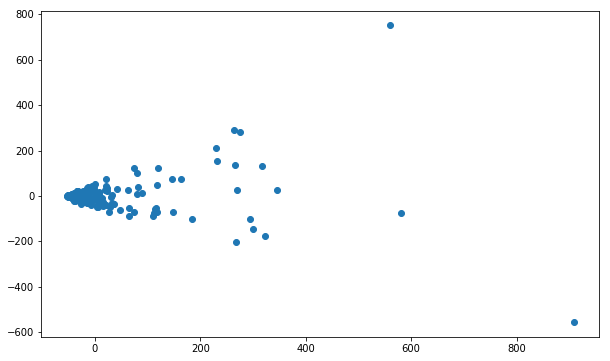

In [9]:
cs1.pmi_plot.show(annotate=False)

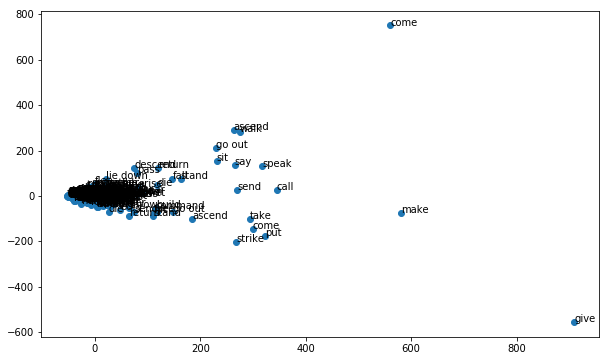

In [10]:
cs1.pmi_plot.show()

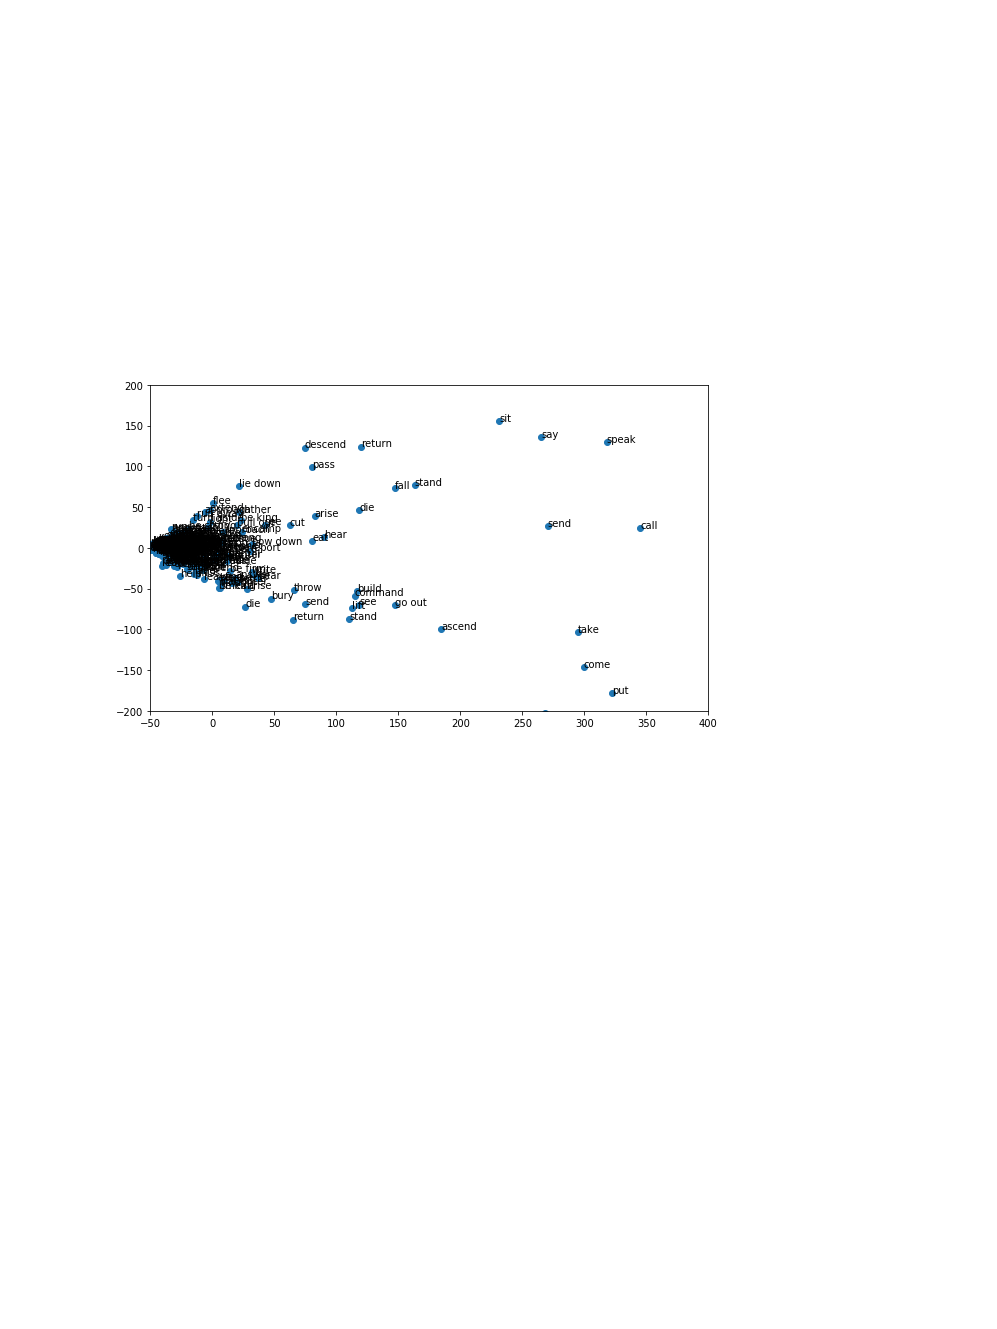

In [11]:
cs1.pmi_plot.show(axis=[-50, 400, -200, 200])

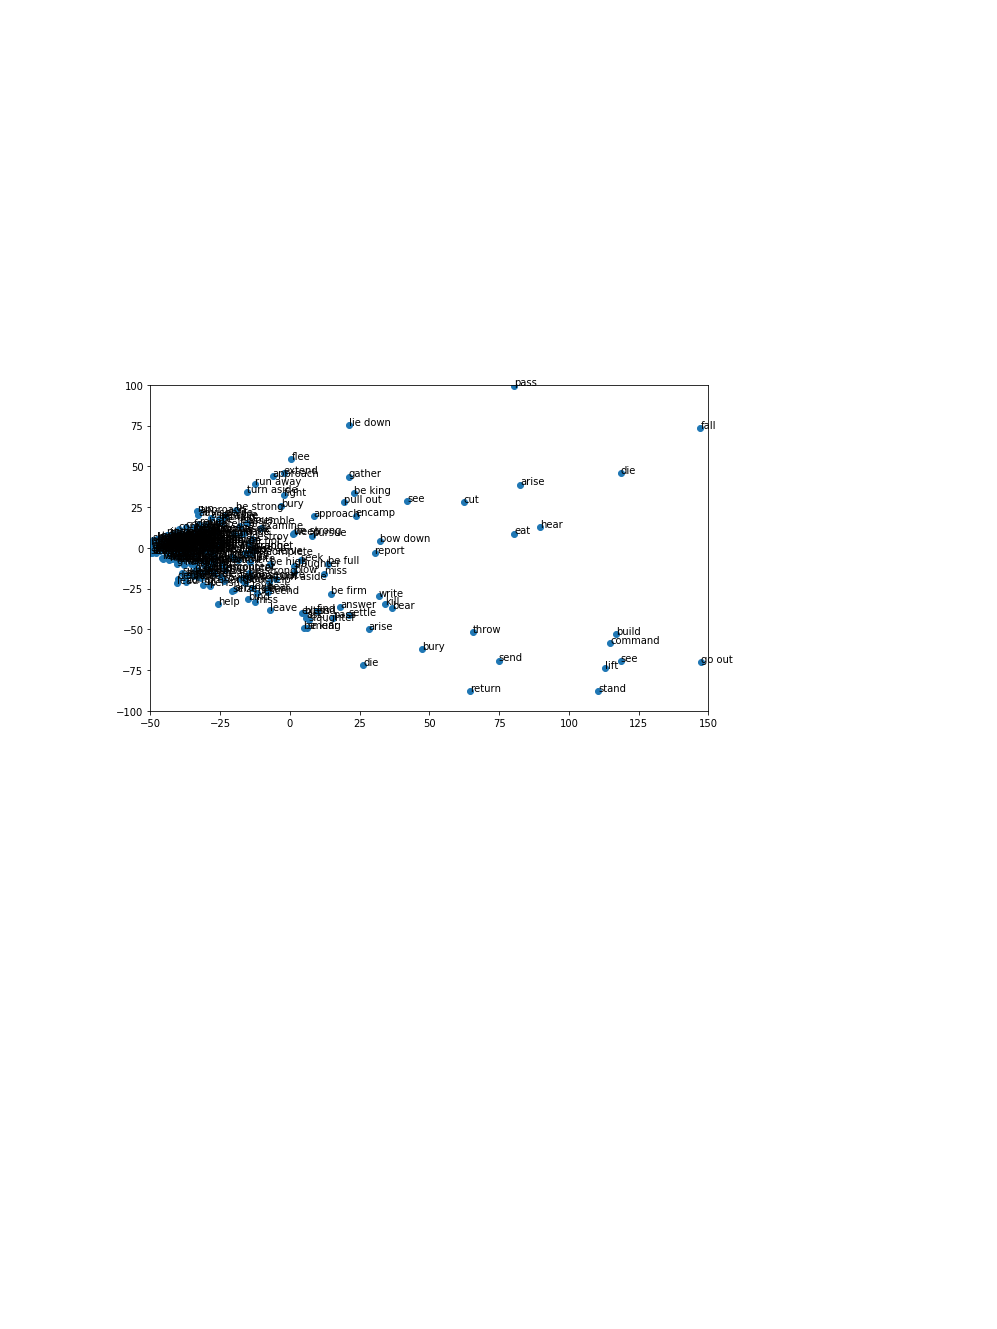

In [12]:
cs1.pmi_plot.show(axis=[-50, 150, -100, 100])

### Comparison with Unaugmented Space

Below I make comparisons between the non-noun enhanced space with the noun enhanced version. To do this, I simply print similarity scores for the top 10 verbs, and then a few for some random ones.

In [15]:
# build unaugmented space
ve1 = VerbExperiment1(tf_api=tf_api)
vs1 = SemSpace(ve1, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     0.45s Finished PPMI...
  0.45s Building pairwise matrices...
   |     0.00s Building pairwise distances...
   |     5.05s Building pairwise similarities...
  7.52s space is ready!


In [16]:
freq_sorted = cs1.raw.sum().sort_values(ascending=False).head(200)

In [17]:
freq_sorted.tail()

RXY[.qal     17.0
ZNH[.qal     17.0
J<Y[.nif     17.0
HLL[.piel    17.0
PG<[.qal     17.0
dtype: float64

In [18]:
for lex in freq_sorted.index[:20]:
    
    key = f'{lex} ({ce1.target2gloss[lex]})'
    
    print(f'unaugmented verb space, {lex}:')
    print(vs1.similarity_pmi[key].sort_values(ascending=False).head(10))
    print()
    print(f'augmented verb space, {lex}:')
    print(cs1.similarity_pmi[key].sort_values(ascending=False).head(10))
    print('\n', '-'*30, '\n')

unaugmented verb space, >MR[.qal:
>MR[.qal (say)         1.000000
BW>[.qal (come)        0.181074
DBR[.piel (speak)      0.170415
CM<[.qal (hear)        0.155148
QR>[.qal (call)        0.144892
NGD[.hif (report)      0.142971
NGC[.qal (approach)    0.138992
QWM[.qal (arise)       0.132001
CLX[.qal (send)        0.131483
<NH[.qal (answer)      0.125281
Name: >MR[.qal (say), dtype: float64

augmented verb space, >MR[.qal:
>MR[.qal (say)        1.000000
DBR[.piel (speak)     0.370807
NGD[.hif (report)     0.369318
R>H[.nif (see)        0.362100
CWB[.qal (return)     0.332315
QR>[.qal (call)       0.323842
<FH[.qal (make)       0.314878
CLX[.qal (send)       0.312522
HLK[.qal (walk)       0.296826
KWN[.hif (be firm)    0.296159
Name: >MR[.qal (say), dtype: float64

 ------------------------------ 

unaugmented verb space, BW>[.qal:
BW>[.qal (come)      1.000000
>MR[.qal (say)       0.181074
JY>[.qal (go out)    0.172410
CWB[.qal (return)    0.164209
HLK[.qal (walk)      0.162491
<LH[.qal (

In [19]:
random.seed(a=2)
freq_sorted_random = list(i for i in freq_sorted.index)[100:]
random.shuffle(freq_sorted_random)

for lex in freq_sorted_random[:10]:
    
    key = f'{lex} ({ce1.target2gloss[lex]})'
    
    print(f'unaugmented verb space, {lex}:')
    print(vs1.similarity_pmi[key].sort_values(ascending=False).head(10))
    print()
    print(f'augmented verb space, {lex}:')
    print(cs1.similarity_pmi[key].sort_values(ascending=False).head(10))
    print('\n', '-'*30, '\n')

unaugmented verb space, JRD[.hif:
JRD[.hif (descend)       1.000000
CQP[.nif (look)          0.229299
GZR[.nif (cut)           0.149248
RXQ[.hif (be far)        0.110174
XV>[.hit (miss)          0.106721
NPY[.qal (shatter)       0.106003
<RH[.piel (pour out)     0.105737
QLL[.hif (be slight)     0.099238
TL>[.qal (hang)          0.093627
NGN[.piel (play harp)    0.091600
Name: JRD[.hif (descend), dtype: float64

augmented verb space, JRD[.hif:
JRD[.hif (descend)       1.000000
NVH[.hif (extend)        0.355994
>SR[.qal (bind)          0.333055
CLK[.hif (throw)         0.289405
SWR[.hif (turn aside)    0.286496
CQP[.hif (look)          0.279271
BW>[.hif (come)          0.267859
CLX[.piel (send)         0.177485
STR[.hif (hide)          0.146605
QBR[.qal (bury)          0.146204
Name: JRD[.hif (descend), dtype: float64

 ------------------------------ 

unaugmented verb space, MKR[.qal:
MKR[.qal (sell)           1.000000
QNH[.qal (buy)            0.127823
BZH[.qal (despise)        0.1230

## Attempt Clustering

In [32]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.nan_to_num(cs1.pairwise_raw, 0))
cluster_1_count = kmeans.labels_[kmeans.labels_ == 0].shape[0]
cluster_2_count = kmeans.labels_[kmeans.labels_ == 1].shape[0]

print(f'cluster_1 size: {cluster_1_count} ({round(cluster_1_count / kmeans.labels_.shape[0], 3)})')
print(f'cluster_2 size: {cluster_2_count} ({round(cluster_2_count / kmeans.labels_.shape[0], 3)})')

cluster_1 size: 202 (0.656)
cluster_2 size: 106 (0.344)


In [34]:
cglossedmin = pd.DataFrame(kmeans.labels_, 
                           index=[f'{F.lex.v(ce1.target2lex[w])}.{F.vs.v(ce1.target2node[w])} -- {ce1.target2gloss[w]}' for w in cs1.raw.columns], 
                           columns=['cluster']).fillna(0)

clustmin = pd.DataFrame(kmeans.labels_, 
                        index=cs1.raw.columns, 
                        columns=['cluster']).fillna(0)

cglossedmin[cglossedmin.cluster == 0]

,cluster
"<BD[.qal -- work, serve",0
<BR[.hif -- pass,0
<FH[.nif -- make,0
<LH[.hif -- ascend,0
<LH[.nif -- ascend,0
<MD[.hif -- stand,0
<RK[.qal -- arrange,0
"<WD[.hif -- warn, to witness",0
<ZB[.qal -- leave,0
<ZR[.qal -- help,0


In [36]:
cglossedmin[cglossedmin.cluster == 1]

,cluster
<BR[.qal -- pass,1
<FH[.qal -- make,1
<LH[.qal -- ascend,1
<MD[.qal -- stand,1
<NH[.qal -- answer,1
<WR[.hif -- be awake,1
>BH[.qal -- want,1
>HB[.qal -- love,1
>MR[.qal -- say,1
>SP[.nif -- gather,1


In [47]:
clust1_tendencies = cs1.raw[clustmin[clustmin.cluster == 0].index].sum(axis=1).sort_values(ascending=False)
clust2_tendencies = cs1.raw[clustmin[clustmin.cluster == 1].index].sum(axis=1).sort_values(ascending=False)

clust1_tendencies.head(100)

Pred.Time.CNH/        21.351893
Pred.Adju.<L_KN       10.576974
Pred.Time.B_BQR=/      7.747281
Pred.Time.JWM/         7.550019
Pred.Objc.FRJD/        7.020340
Pred.Time.B_JWM/       6.768611
Pred.Time.XDC=/        6.668551
Pred.Time.B_CNH/       5.600092
Pred.Time.B_XDC=/      5.238758
Pred.Subj.DWD==/       4.917951
Pred.Subj.JHWH/        4.793667
Pred.Time.B_<T/        4.669792
Pred.Subj.MCH=/        4.555151
Pred.Subj.MLK/         4.398282
Pred.Subj.<M/          4.364738
Pred.Time.LJLH/        4.313468
Pred.Subj.BN/          4.271346
Pred.Subj.C>WL=/       4.260283
Pred.Subj.JHWC</       4.031593
Pred.Loca.CM           3.927976
Pred.Subj.>JC/         3.823515
Pred.Subj.J<QB/        3.810461
Pred.Objc.PLJV/        3.750537
Pred.Subj.GD<WN/       3.736615
Pred.Objc.CM/          3.692967
Pred.Subj.>BRHM/       3.630119
Pred.Cmpl.MN_<L        3.548797
Pred.Subj.JWSP/        3.386199
Pred.Objc.BN/          3.383872
Pred.Subj.JFR>L/       3.367572
                        ...    
Pred.Sub

In [46]:
clust2_tendencies.head(100)

Pred.Subj.JHWH/       37.712077
Pred.Subj.DWD==/      26.815266
Pred.Subj.MCH=/       26.744610
Pred.Subj.MLK/        24.604943
Pred.Subj.C>WL=/      22.811193
Pred.Subj.GD<WN/      21.039098
Pred.Subj.>LHJM/      20.638719
Pred.Subj.JHWC</      20.626608
Pred.Subj.>JC/        20.344584
Pred.Subj.<M/         19.821068
Pred.Subj.J<QB/       18.995116
Pred.Subj.BN/         18.203151
Pred.Subj.JW>B/       18.163030
Pred.Subj.>BRHM/      18.082923
Pred.Subj.CMW>L/      17.961892
Pred.Subj.BLQ/        17.375490
Pred.Subj.JWSP/       17.288387
Pred.Subj.CLMH=/      16.670952
Pred.Subj.>X>B/       16.526586
Pred.Subj.JHWNTN/     16.463799
Pred.Subj.ML>K/       16.302407
Pred.Subj.>HRN/       15.777874
Pred.Subj.PR<H/       15.516704
Pred.Subj.>LJC</      15.366539
Pred.Subj.>BNR/       15.324644
Pred.Subj.JFR>L/      15.038004
Pred.Subj.JYXQ/       14.873891
Pred.Subj.FR/         14.838512
Pred.Subj.R>WBN/      14.641699
Pred.Subj.JC<JHW/     14.335793
                        ...    
Pred.Sub

## Subject Only Space

Below we experiment with building the verb space with only subject basis elements. The primary goal here is to get a binary division of the verbs. I hope to see something like active versus passive or dynamic versus stative.

In [56]:
from project_code.experiments import CompositeVerbSubj

In [57]:
indent(reset=True)
info('building composite experiment...')
ce2 = CompositeVerbSubj(ns1.sim_pmi_normalized, tf_api=tf_api) 
info(f'composite experiment with dim {ce2.data.shape} ready...')

  0.00s building composite experiment...
    25s composite experiment with dim (19208, 114) ready...


In [58]:
cs2 = SemSpace(ce2, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     0.12s Finished PPMI...
  0.12s Building pairwise matrices...
   |     0.00s Building pairwise distances...
   |     0.19s Building pairwise similarities...
  1.20s space is ready!


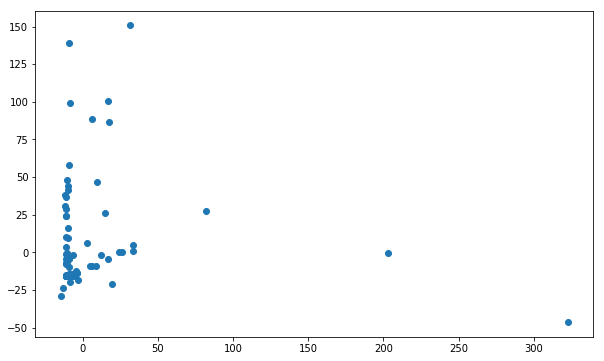

In [105]:
cs2.pmi_plot.show(annotate=False)

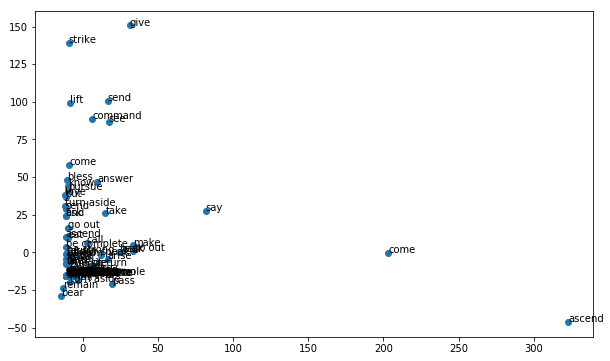

In [106]:
cs2.pmi_plot.show()

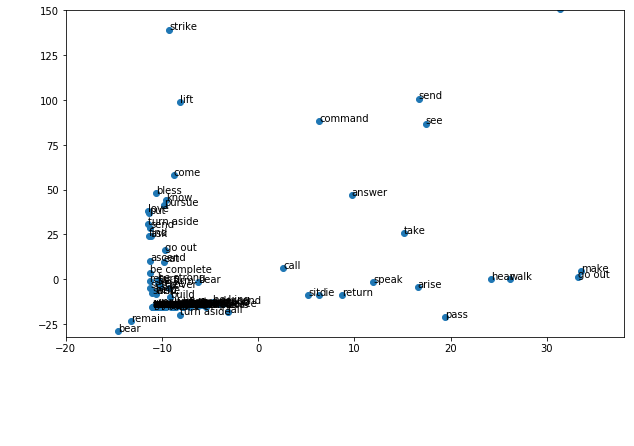

In [117]:
cs2.pmi_plot.show(axis=[-20, 38, -32, 150])

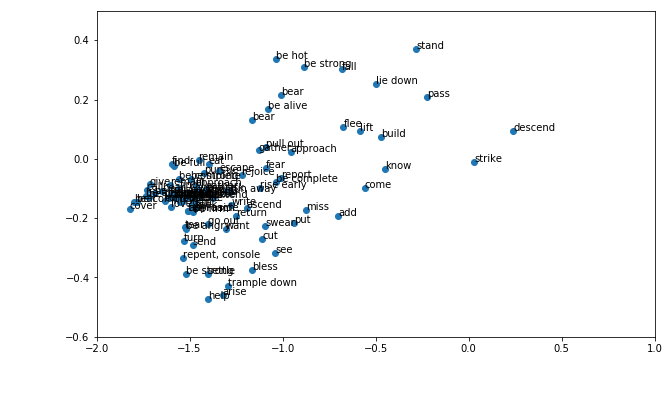

In [67]:
cs2.raw_plot.show(axis=[-2, 1, -0.6, 0.5])

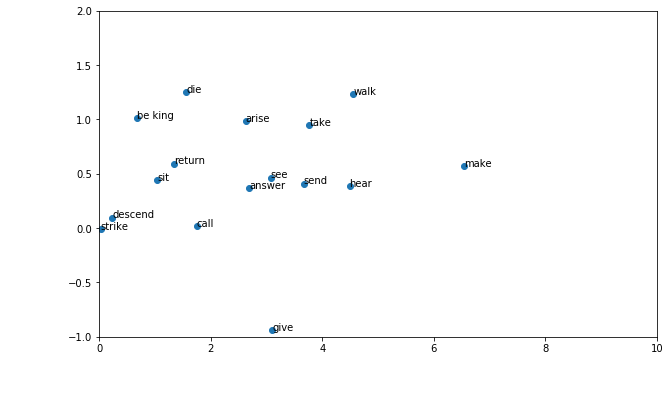

In [100]:
cs2.raw_plot.show(axis=[0, 10, -1, 2])

In [118]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.nan_to_num(cs2.pairwise_pmi, 0))
cluster_1_count = kmeans.labels_[kmeans.labels_ == 0].shape[0]
cluster_2_count = kmeans.labels_[kmeans.labels_ == 1].shape[0]

print(f'cluster_1 size: {cluster_1_count} ({round(cluster_1_count / kmeans.labels_.shape[0], 3)})')
print(f'cluster_2 size: {cluster_2_count} ({round(cluster_2_count / kmeans.labels_.shape[0], 3)})')

cluster_1 size: 27 (0.237)
cluster_2 size: 87 (0.763)


In [119]:
cglossedmin = pd.DataFrame(kmeans.labels_, 
                           index=[f'{F.lex.v(ce2.target2lex[w])}.{F.vs.v(ce2.target2node[w])} -- {ce2.target2gloss[w]}' for w in cs2.raw.columns], 
                           columns=['cluster']).fillna(0)

clustmin = pd.DataFrame(kmeans.labels_, 
                        index=cs2.raw.columns, 
                        columns=['cluster']).fillna(0)

cglossedmin[cglossedmin.cluster == 0]

,cluster
<LH[.hif -- ascend,0
<NH[.qal -- answer,0
>HB[.qal -- love,0
>KL[.qal -- eat,0
BQC[.piel -- seek,0
BRK[.piel -- bless,0
BW>[.hif -- come,0
C>L[.qal -- ask,0
CLX[.piel -- send,0
CLX[.qal -- send,0


In [120]:
cglossedmin[cglossedmin.cluster == 1]

,cluster
<BR[.qal -- pass,1
<FH[.qal -- make,1
<LH[.qal -- ascend,1
<MD[.qal -- stand,1
>BH[.qal -- want,1
>MR[.qal -- say,1
>SP[.nif -- gather,1
>SP[.qal -- gather,1
BKH[.qal -- weep,1
BNH[.qal -- build,1


### Rough Search for Stativity

Look for signs of stavity by looking for the "be" gloss.

In [124]:
clust1_be = [i for i in cglossedmin[cglossedmin.cluster == 0].index 
                 if 'be' in i
                 and 'hif' not in i
            ]
clust2_be = [i for i in cglossedmin[cglossedmin.cluster == 1].index 
                 if 'be' in i
                 and 'hif' not in i
            ]

print(len(clust1_be))
print(len(clust2_be))

2
16


In [121]:
clust1_be = [i for i in cglossedmin[cglossedmin.cluster == 0].index 
                 if 'be' in i
                 and 'hif' not in i
            ]
clust2_be = [i for i in cglossedmin[cglossedmin.cluster == 1].index 
                 if 'be' in i
                 and 'hif' not in i
            ]

clust1_be = len(clust1_be) / cglossedmin[cglossedmin.cluster == 0].shape[0]
clust2_be = len(clust2_be) / cglossedmin[cglossedmin.cluster == 0].shape[0]

clust1_be

0.07407407407407407

In [122]:
clust2_be

0.5925925925925926

In [123]:
clust2_be - clust1_be

0.5185185185185185

### Survey Cluster Tendencies

In [75]:
clust1_tendencies = cs2.raw[clustmin[clustmin.cluster == 0].index].sum(axis=1).sort_values(ascending=False)
clust2_tendencies = cs2.raw[clustmin[clustmin.cluster == 1].index].sum(axis=1).sort_values(ascending=False)

clust1_tendencies.head(100)

Pred.Subj.>P/         2.844111
Pred.Subj.BN/         1.925435
Pred.Subj.>JC/        1.872186
Pred.Subj.MCH=/       1.869198
Pred.Subj.DWD==/      1.845573
Pred.Subj.<M/         1.670490
Pred.Subj.JHWH/       1.569204
Pred.Subj.C>WL=/      1.526584
Pred.Subj.J<QB/       1.486417
Pred.Subj.NX/         1.458390
Pred.Subj.JHWC</      1.456036
Pred.Subj.MLK/        1.446345
Pred.Subj.>BRHM/      1.441621
Pred.Subj.DGL/        1.410457
Pred.Subj.DBR/        1.399988
Pred.Subj.ML>K/       1.398887
Pred.Subj.TRX/        1.390946
Pred.Subj.GD<WN/      1.364949
Pred.Subj.>BRM/       1.358057
Pred.Subj.JW>B/       1.307607
Pred.Subj.FR/         1.302950
Pred.Subj.JFR>L/      1.300814
Pred.Subj.B<Z/        1.286798
Pred.Subj.CMW>L/      1.263112
Pred.Subj.HW>         1.261817
Pred.Subj.BRWK/       1.244419
Pred.Subj.JWSP/       1.236779
Pred.Subj.LWV=/       1.229313
Pred.Subj.>CH/        1.221073
Pred.Subj.NXCWN/      1.220559
                        ...   
Pred.Subj.FRWG/       1.078469
Pred.Sub

In [76]:
clust2_tendencies.head(100)

Pred.Subj.JHWH/      37.559338
Pred.Subj.DWD==/     27.036219
Pred.Subj.MCH=/      26.676610
Pred.Subj.MLK/       24.621843
Pred.Subj.C>WL=/     23.040925
Pred.Subj.GD<WN/     21.257936
Pred.Subj.JHWC</     20.987704
Pred.Subj.>LHJM/     20.397294
Pred.Subj.>JC/       20.010113
Pred.Subj.<M/        19.626165
Pred.Subj.J<QB/      19.200319
Pred.Subj.>BRHM/     18.308575
Pred.Subj.JW>B/      18.250904
Pred.Subj.BN/        18.171478
Pred.Subj.CMW>L/     18.073067
Pred.Subj.BLQ/       17.714918
Pred.Subj.JWSP/      17.354909
Pred.Subj.>X>B/      17.046432
Pred.Subj.CLMH=/     16.949602
Pred.Subj.JHWNTN/    16.751526
Pred.Subj.ML>K/      16.336301
Pred.Subj.>HRN/      15.778603
Pred.Subj.PR<H/      15.562742
Pred.Subj.>LJC</     15.523427
Pred.Subj.>BNR/      15.411648
Pred.Subj.JYXQ/      14.984098
Pred.Subj.JFR>L/     14.908880
Pred.Subj.R>WBN/     14.742651
Pred.Subj.FR/        14.606448
Pred.Subj.JRB<M/     14.412108
                       ...    
Pred.Subj.>NJ        10.994151
Pred.Sub